In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import pyplot
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from  sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
from sklearn import metrics
from sklearn.datasets import make_circles
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
store_data=pd.read_csv("C:/Users/Saud Shaikh/Downloads/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")

In [3]:
store_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [4]:
store_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
store_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
store_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
store_data.shape

(14204, 12)

In [9]:
store_data=store_data.set_index('Item_Identifier')
store_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
cat=[]
con=[]
for i in store_data.columns:
    if store_data[i].nunique()<50:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({"Categorical":cat,
                "Continuous": con}, headers = ["categorical", "continuous"]))           

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Weight
Item_Type                  Item_Visibility
Outlet_Identifier          Item_MRP
Outlet_Establishment_Year  Item_Outlet_Sales
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [11]:
for i in store_data.columns:
    print(i,':',store_data[i].nunique())

Item_Weight : 415
Item_Fat_Content : 2
Item_Visibility : 13010
Item_Type : 16
Item_MRP : 8052
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


In [12]:
for i in store_data.columns:
    if store_data[i].nunique()<50:
        print(i,':',store_data[i].unique())

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year : [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


# EDA

## Categorical Data 

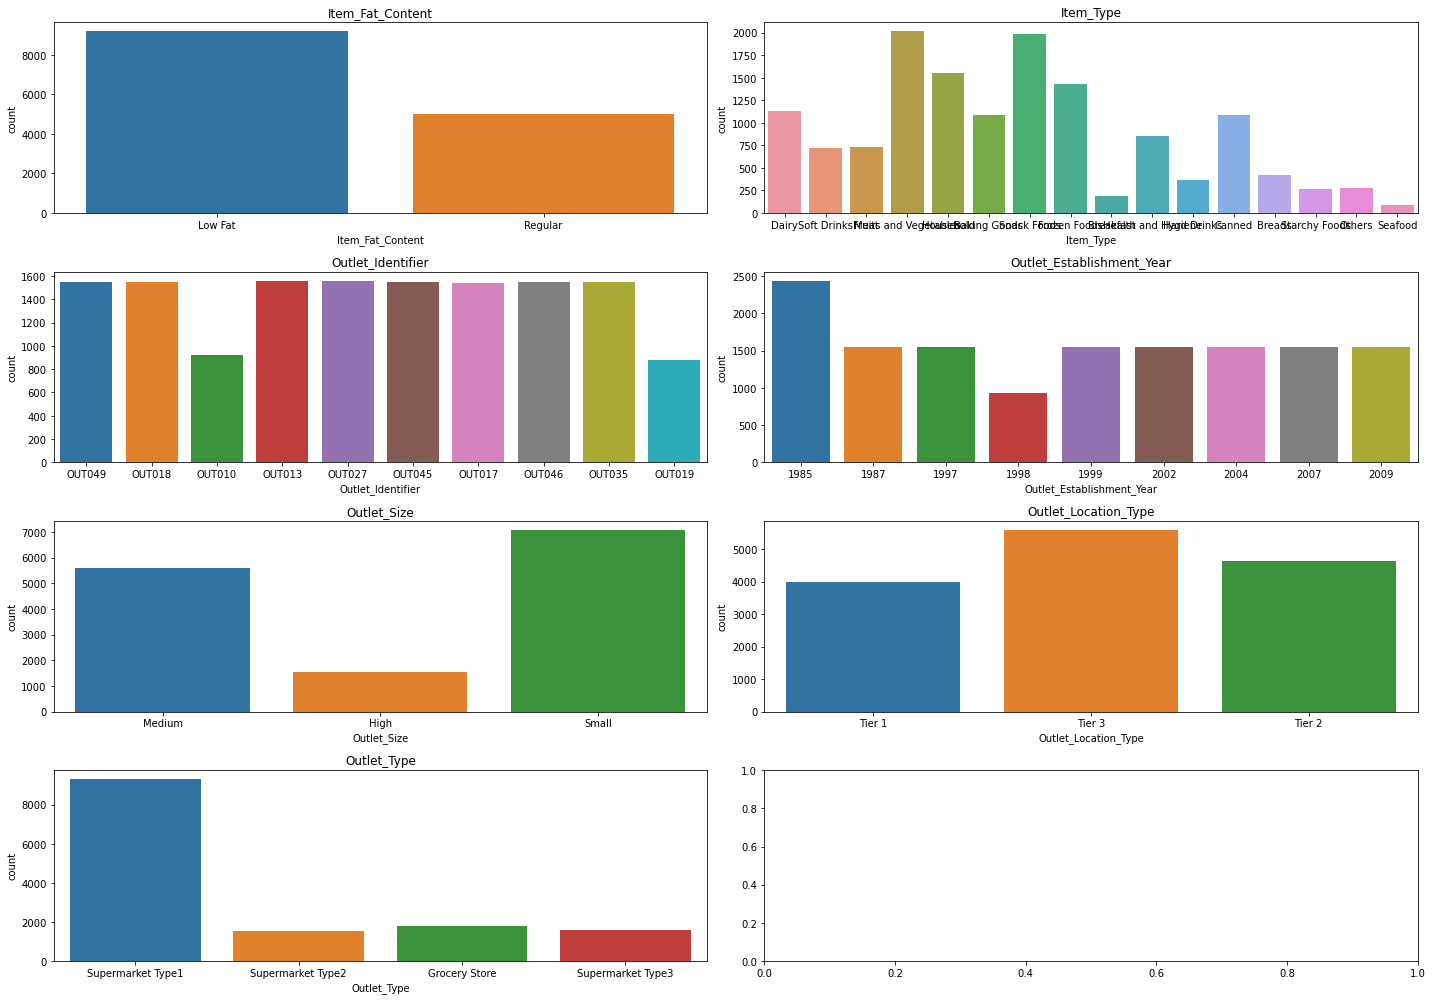

In [13]:
r=2
c=int(len(cat)/r)+1
figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)
for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=store_data,x=store_data[i],ax=ax)
    ax.set_title(i)
plt.show() 

## Continuos Data 

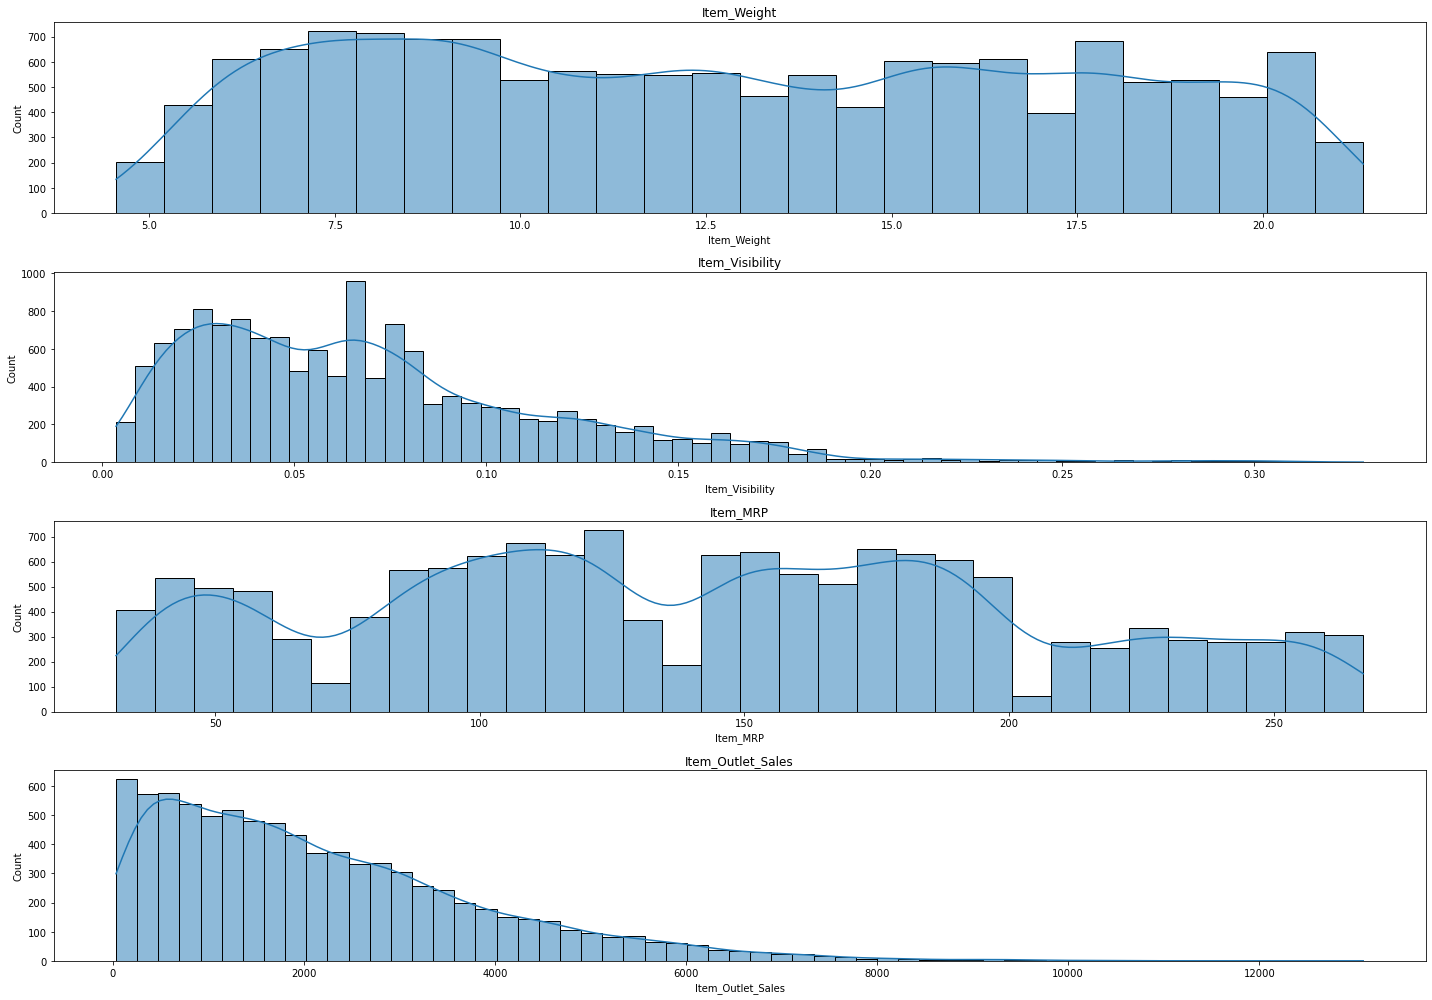

In [14]:
r=1
c=int(len(con)/r)

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(con,axes.flatten()[:len(con)]):
    sns.histplot(data=store_data,x=store_data[i].values,ax=ax,kde=True)
    ax.set_xlabel(i)
    ax.set_title(i)
plt.show()  

### Interactive Univariate Analysis of Categorical Variables

In [15]:
from ipywidgets import interact

In [16]:
def cat_info(col): 
    print(f"Unique values in {store_data.columns[col]} are: {store_data.iloc[:,col].unique()}") 
    print(f"Mode of {store_data.columns[col]} is {store_data.iloc[:,col].mode()[0]}") 
    print(f"Number of missing values in {store_data.columns[col]} is {store_data.iloc[:,col].isnull().sum()}") 
    if store_data.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {store_data.columns[col]} column")

In [142]:
data_df2=store_data.select_dtypes('object')
def cat_vis(col,palette='magma'):
    cat_info(col)
    sns.countplot(data=data_df2,x=data_df2.iloc[:,col],palette=palette)
    plt.title(data_df2.columns[col])
    plt.show()
interact(cat_vis,col=(0,len(data_df2.columns),1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=0, description='col', max=0), Text(value='magma', description='palette')…

<function __main__.cat_vis(col, palette='magma')>

In [18]:
def cat_info(col): 
    print(f"Unique values in {col} are: {store_data[col].unique()}") 
    print(f"Mode of {col} is {store_data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {store_data[col].isnull().sum()}") 
    if store_data[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")

In [19]:
cat_info("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


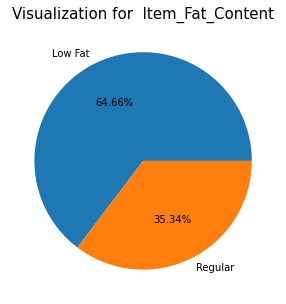

In [20]:
plt.figure(figsize=(15,5))
plt.title('Visualization for  Item_Fat_Content',fontsize=15)
plt.pie(store_data['Item_Fat_Content'].value_counts(),labels=store_data['Item_Fat_Content'].unique(),autopct='%0.2f%%');

In [21]:
cat_info("Item_Type")

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


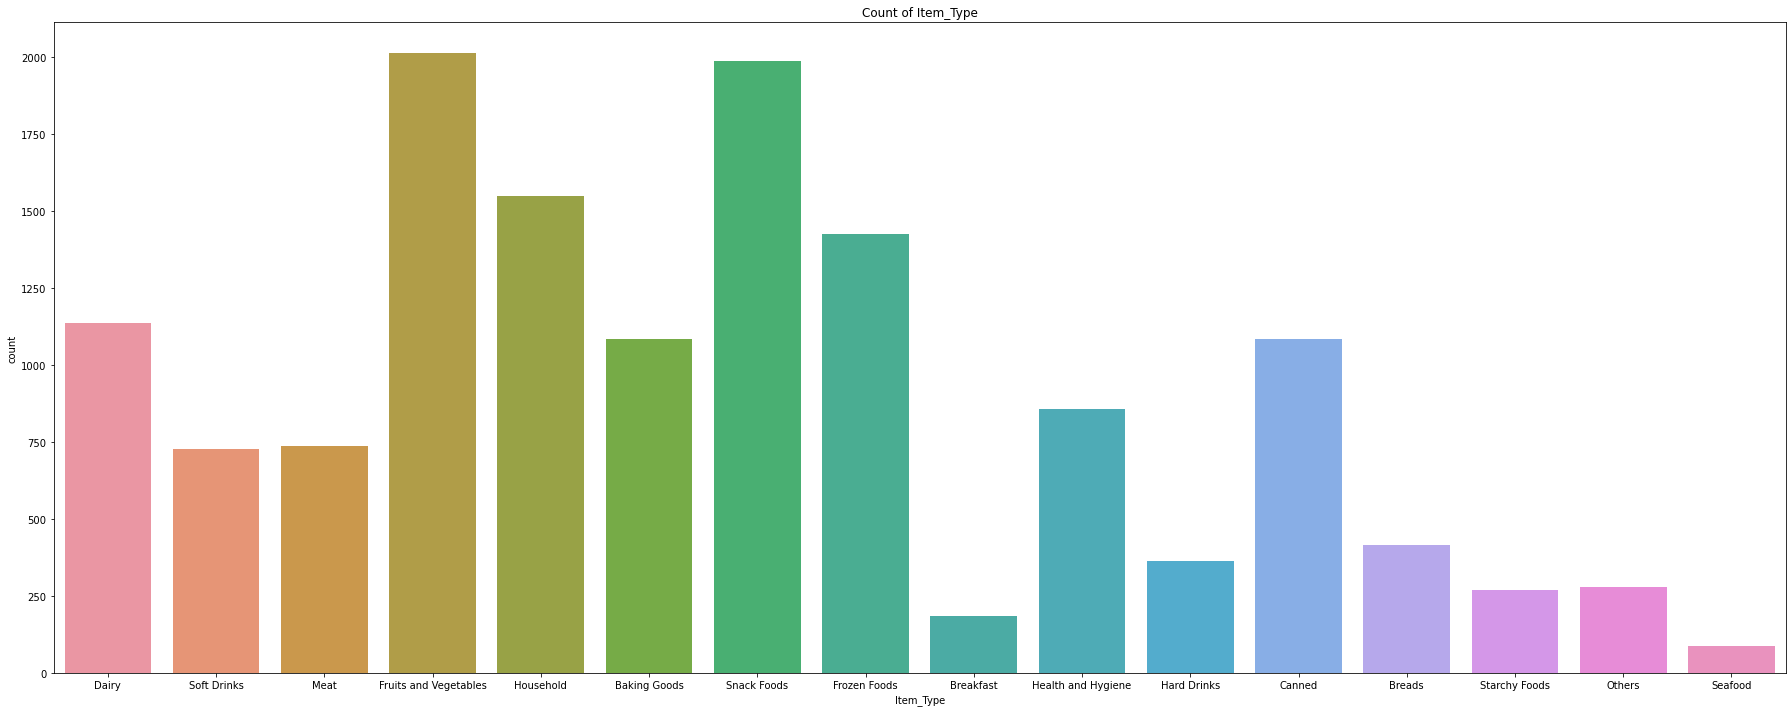

In [22]:
plt.figure(figsize=(25,10))
plt.title('Count of Item_Type')
sns.countplot(data=store_data,x=store_data['Item_Type'])
plt.tight_layout()
plt.show()

In [23]:
cat_info("Outlet_Identifier")

Unique values in Outlet_Identifier are: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Mode of Outlet_Identifier is OUT027
Number of missing values in Outlet_Identifier is 0


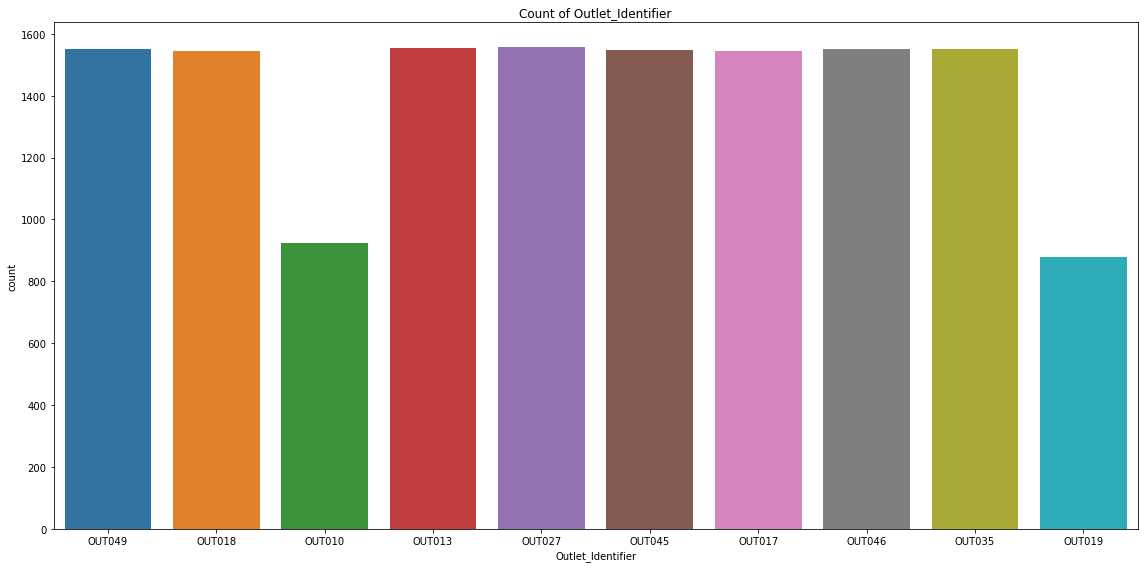

In [24]:
plt.figure(figsize=(16,8))
plt.title('Count of Outlet_Identifier')
sns.countplot(data=store_data,x=store_data['Outlet_Identifier'])
plt.tight_layout()
plt.show()

In [25]:
cat_info("Outlet_Establishment_Year")

Unique values in Outlet_Establishment_Year are: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Mode of Outlet_Establishment_Year is 1985
Number of missing values in Outlet_Establishment_Year is 0


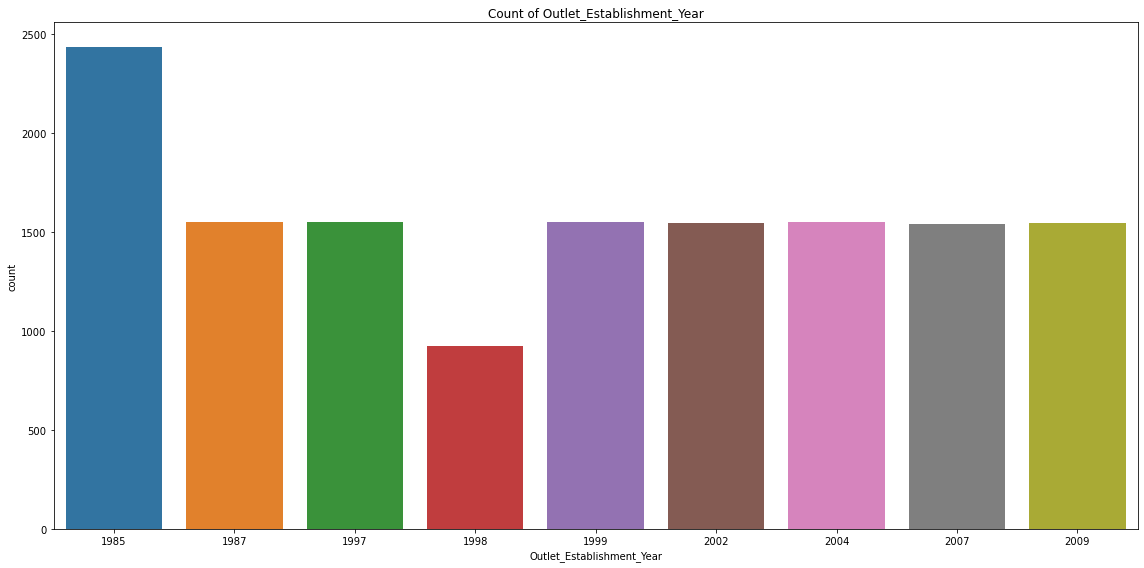

In [26]:
plt.figure(figsize=(16,8))
plt.title('Count of Outlet_Establishment_Year')
sns.countplot(data=store_data,x=store_data['Outlet_Establishment_Year'])
plt.tight_layout()
plt.show()

In [27]:
cat_info('Outlet_Size')

Unique values in Outlet_Size are: ['Medium' 'High' 'Small']
Mode of Outlet_Size is Small
Number of missing values in Outlet_Size is 0


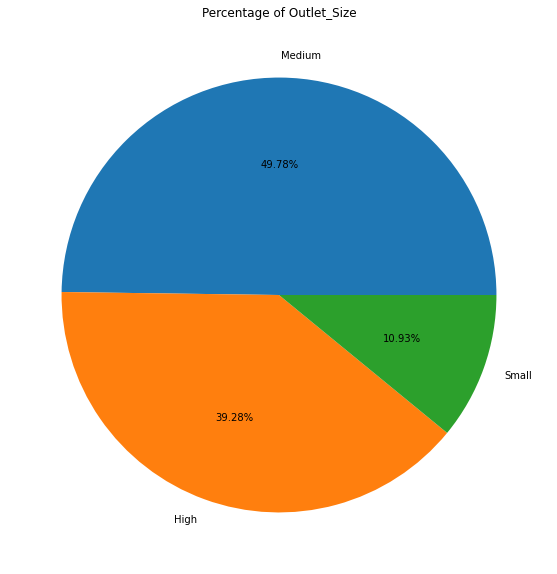

In [28]:
plt.figure(figsize=(20,10))
plt.title('Percentage of Outlet_Size')
plt.pie(store_data['Outlet_Size'].value_counts(),labels=store_data['Outlet_Size'].unique(),autopct='%0.2f%%');

In [29]:
cat_info('Outlet_Location_Type')

Unique values in Outlet_Location_Type are: ['Tier 1' 'Tier 3' 'Tier 2']
Mode of Outlet_Location_Type is Tier 3
Number of missing values in Outlet_Location_Type is 0


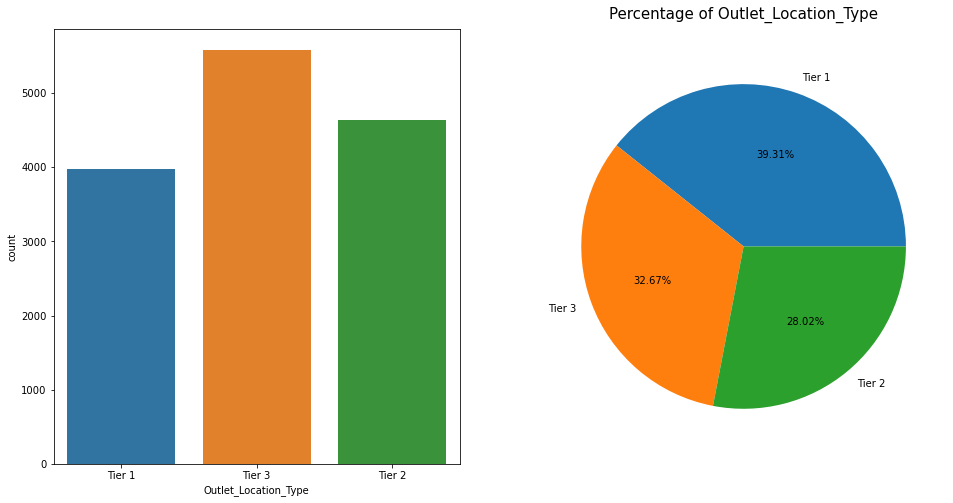

In [30]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=store_data,x=store_data['Outlet_Location_Type'],ax=axes[0])
plt.title('Percentage of Outlet_Location_Type\n',fontsize=15)
plt.pie(store_data['Outlet_Location_Type'].value_counts(),labels=store_data['Outlet_Location_Type'].unique(),autopct='%0.2f%%');

In [31]:
cat_info('Outlet_Type')

Unique values in Outlet_Type are: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Mode of Outlet_Type is Supermarket Type1
Number of missing values in Outlet_Type is 0


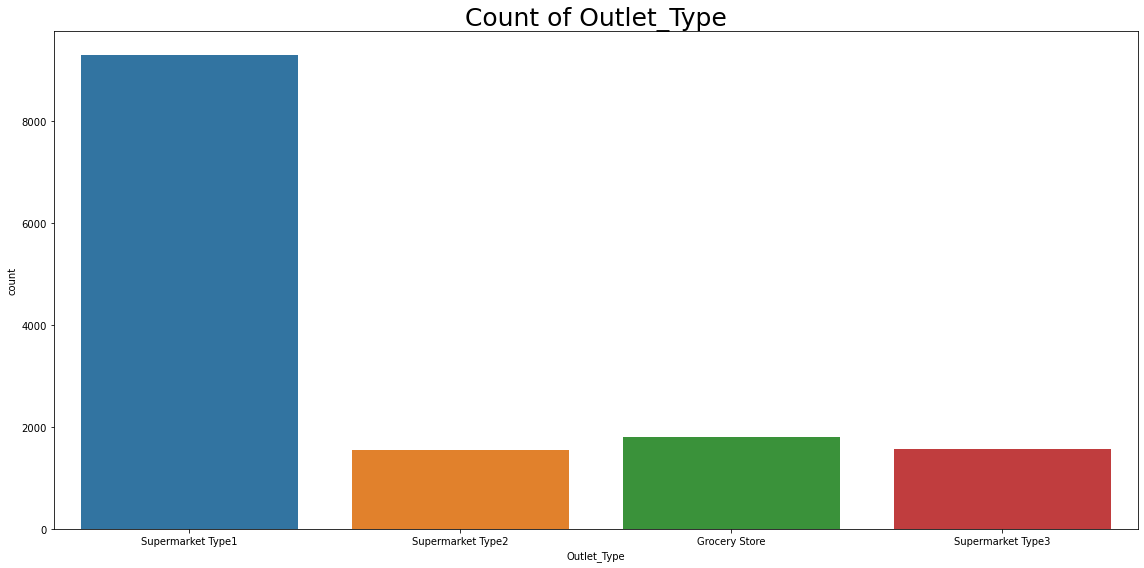

In [32]:
plt.figure(figsize=(16,8))
plt.title('Count of Outlet_Type',fontsize=25)
sns.countplot(data=store_data,x=store_data['Outlet_Type'])
plt.tight_layout()
plt.show()

#### Univariate Analysis of Numerical(Continuous) Variables

In [33]:
def num_info(col):
    print(f"The mean of the {store_data.columns[col]} is {store_data[store_data.columns[col]].mean()}")
    print(f"The median of the {store_data.columns[col]} is {store_data[store_data.columns[col]].median()}")
    print(f"The standard deviation of the {store_data.columns[col]} is {store_data[store_data.columns[col]].std()}")
    print(f"Number of missing values in the {store_data.columns[col]} is {store_data[store_data.columns[col]].isnull().sum()}")

In [34]:
data_df1=store_data.select_dtypes(['float64','int64'])
def con_vis(col,palette='magma'):
    num_info(col)
    data_df1=store_data.select_dtypes(['float64','int64'])
    sns.boxplot(data=data_df1,x=store_data.iloc[:,col],palette=palette)
    plt.title(store_data.columns[col])
    plt.show()

interact(con_vis,col=(0,len(data_df1.columns),1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=2, description='col', max=5), Dropdown(description='palette', options=('…

<function __main__.con_vis(col, palette='magma')>

### # Numerical Analysis 

In [35]:
def num_info(col):
    print(f"The mean of the {col} is {store_data[col].mean()}")
    print(f"The median of the {col} is {store_data[col].median()}")
    print(f"The standard deviation of the {col} is {store_data[col].std()}")
    print(f"Number of missing values in the {col} is {store_data[col].isnull().sum()}")

### Analysis of Item_weight

In [36]:
num_info('Item_Weight')

The mean of the Item_Weight is 12.793380385807628
The median of the Item_Weight is 12.6
The standard deviation of the Item_Weight is 4.6517158036609825
Number of missing values in the Item_Weight is 0


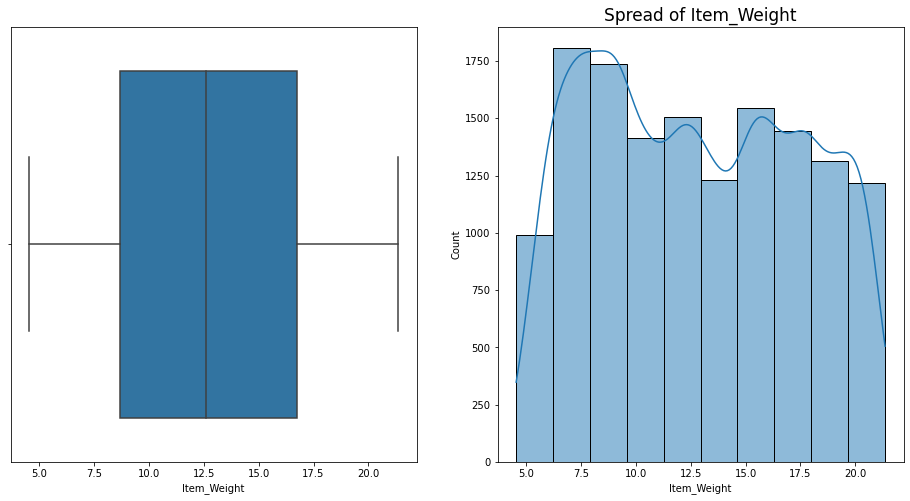

In [37]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Spread of Item_Weight',fontsize=17)
sns.boxplot(store_data['Item_Weight'],ax=axes[0])
sns.histplot(store_data['Item_Weight'],kde=True,ax=axes[1],bins=10)
plt.show()

In [38]:
num_info('Item_Visibility')

The mean of the Item_Visibility is 0.07030079341671354
The median of the Item_Visibility is 0.062347052
The standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in the Item_Visibility is 0


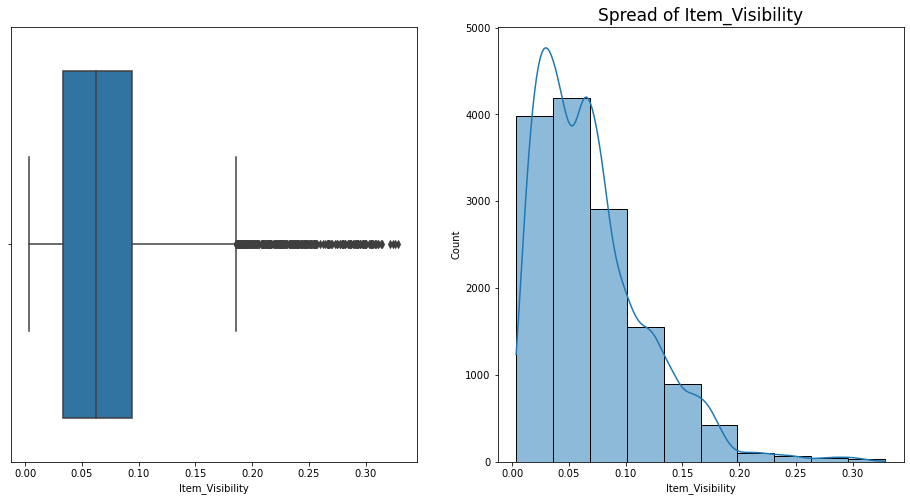

In [39]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Spread of Item_Visibility',fontsize=17)
sns.boxplot(store_data['Item_Visibility'],ax=axes[0])
sns.histplot(store_data['Item_Visibility'],kde=True,ax=axes[1],bins=10)
plt.show()

In [40]:
num_info('Item_Outlet_Sales')

The mean of the Item_Outlet_Sales is 2181.2889135750365
The median of the Item_Outlet_Sales is 1794.331
The standard deviation of the Item_Outlet_Sales is 1706.499615733832
Number of missing values in the Item_Outlet_Sales is 5681


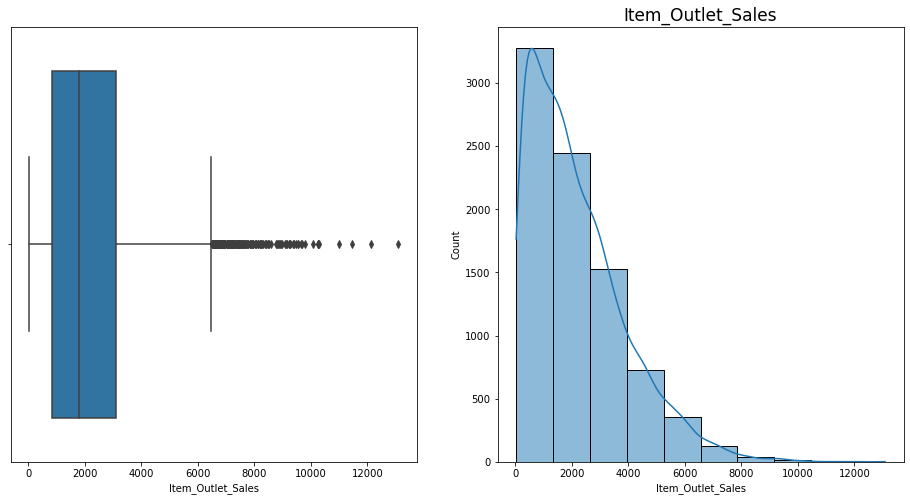

In [41]:
figs,axes = plt.subplots(1,2,figsize=(16,8))
plt.title('Item_Outlet_Sales',fontsize=17)
sns.boxplot(store_data['Item_Outlet_Sales'],ax=axes[0])
sns.histplot(store_data['Item_Outlet_Sales'],kde=True,ax=axes[1],bins=10)
plt.show()

#### Categorical to Categorical 

### Item Fat with Item Type 

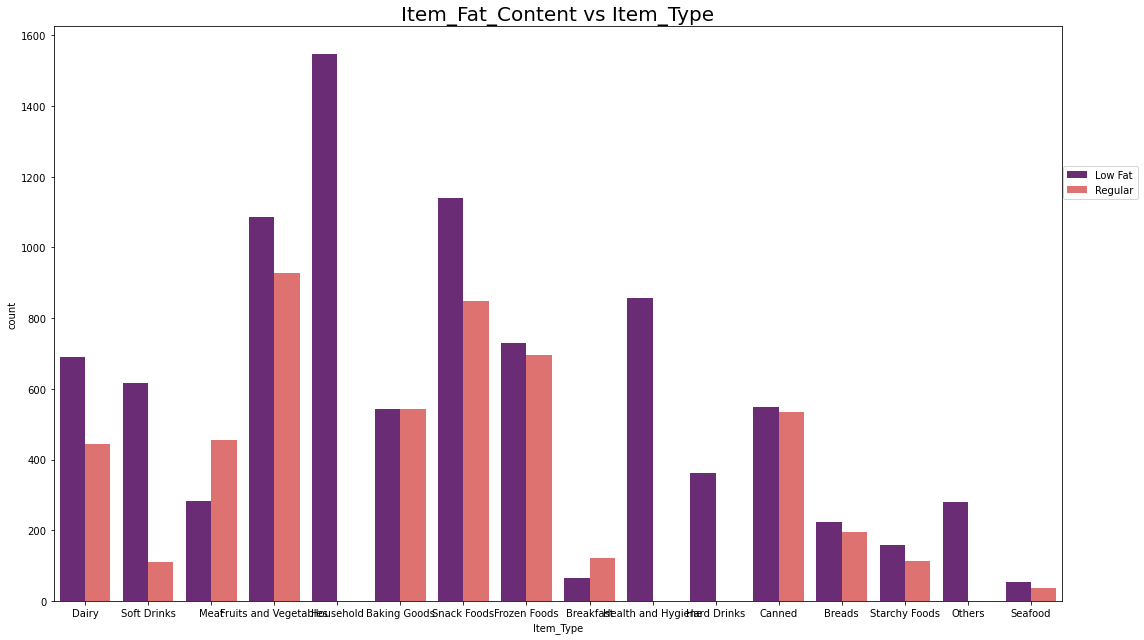

In [42]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "Item_Type", hue = "Item_Fat_Content", data = store_data,palette='magma')
plt.title('Item_Fat_Content vs Item_Type',fontsize=20)
plt.legend(loc=(1.001,0.7))
plt.tight_layout()
plt.show()

###### Item Fat Content Vs Outlet Location 

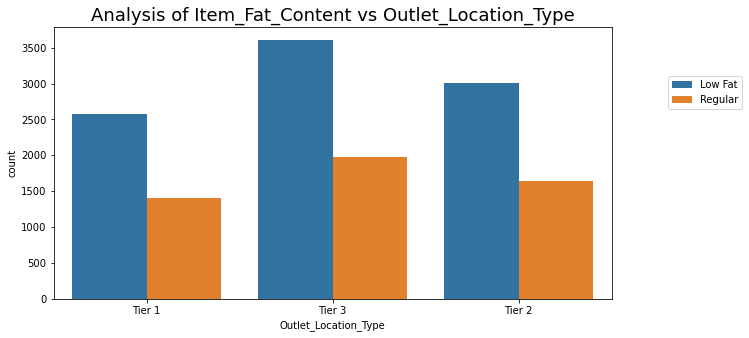

In [43]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Analysis of Item_Fat_Content vs Outlet_Location_Type',fontsize=18)
sns.countplot(x = "Outlet_Location_Type", hue = "Item_Fat_Content", data = store_data)
plt.legend(loc=(1.1,0.7))
plt.show()

##### Categorical to Continuous(Numerical)

In [44]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, FDA15 to FDU37
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.8+ MB


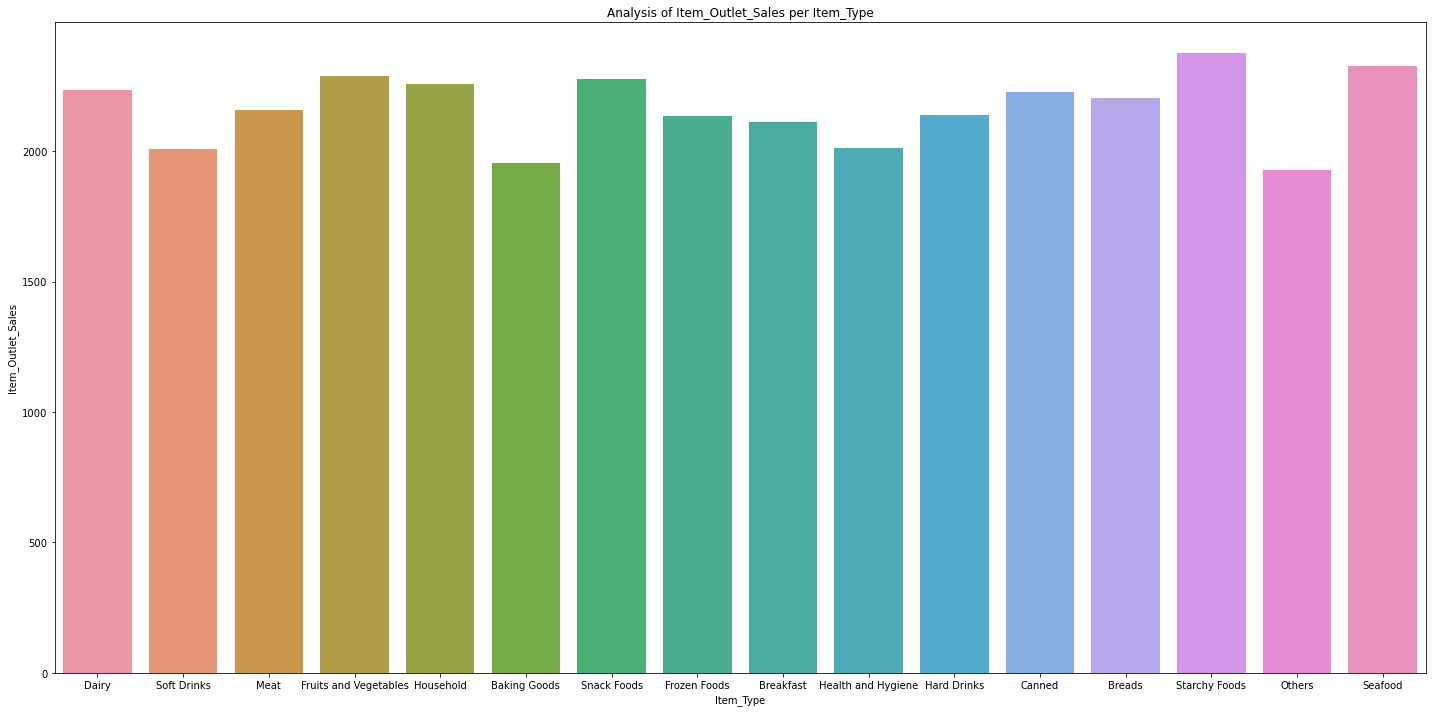

In [45]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=store_data,y=store_data['Item_Outlet_Sales'],x=store_data['Item_Type'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Item_Type')
plt.tight_layout()
plt.show()

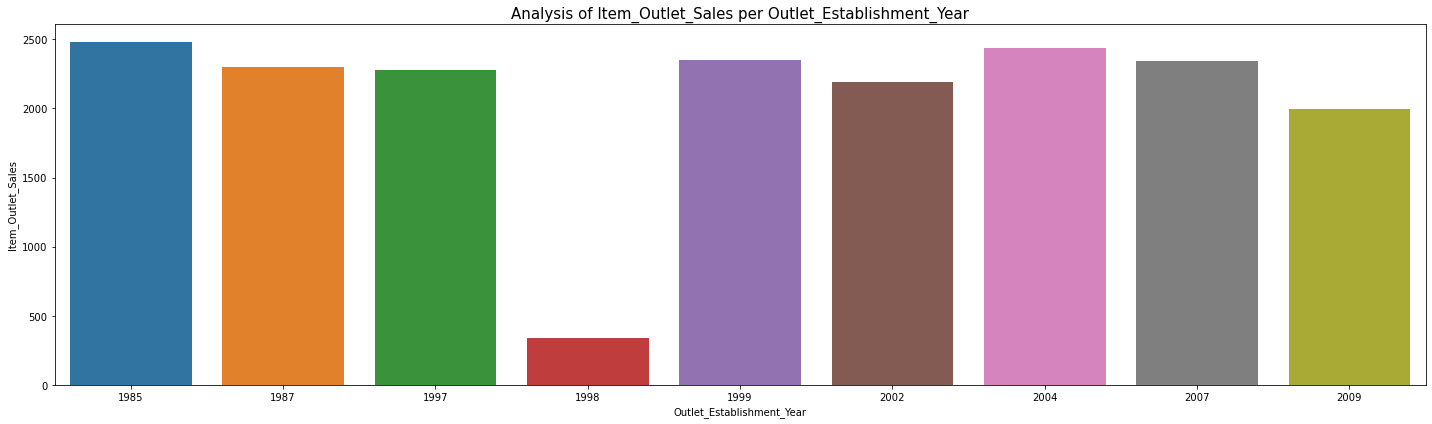

In [46]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.barplot(data=store_data,y=store_data['Item_Outlet_Sales'],x=store_data['Outlet_Establishment_Year'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Outlet_Establishment_Year',fontsize=15)
plt.tight_layout()
plt.show()

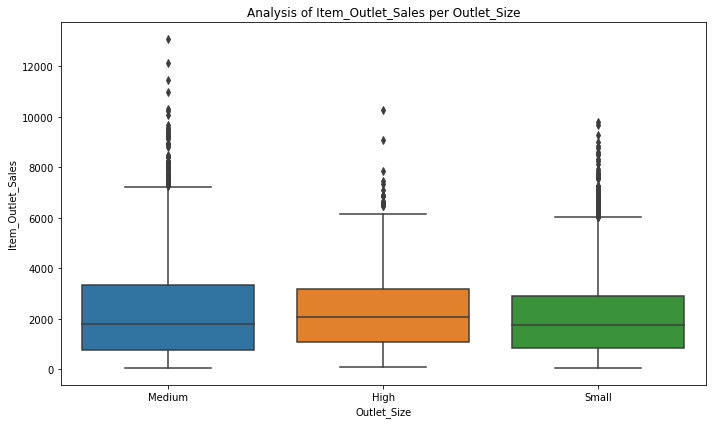

In [47]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=store_data,y=store_data['Item_Outlet_Sales'],x=store_data['Outlet_Size'])
plt.title('Analysis of Item_Outlet_Sales per Outlet_Size')
plt.tight_layout()
plt.show()

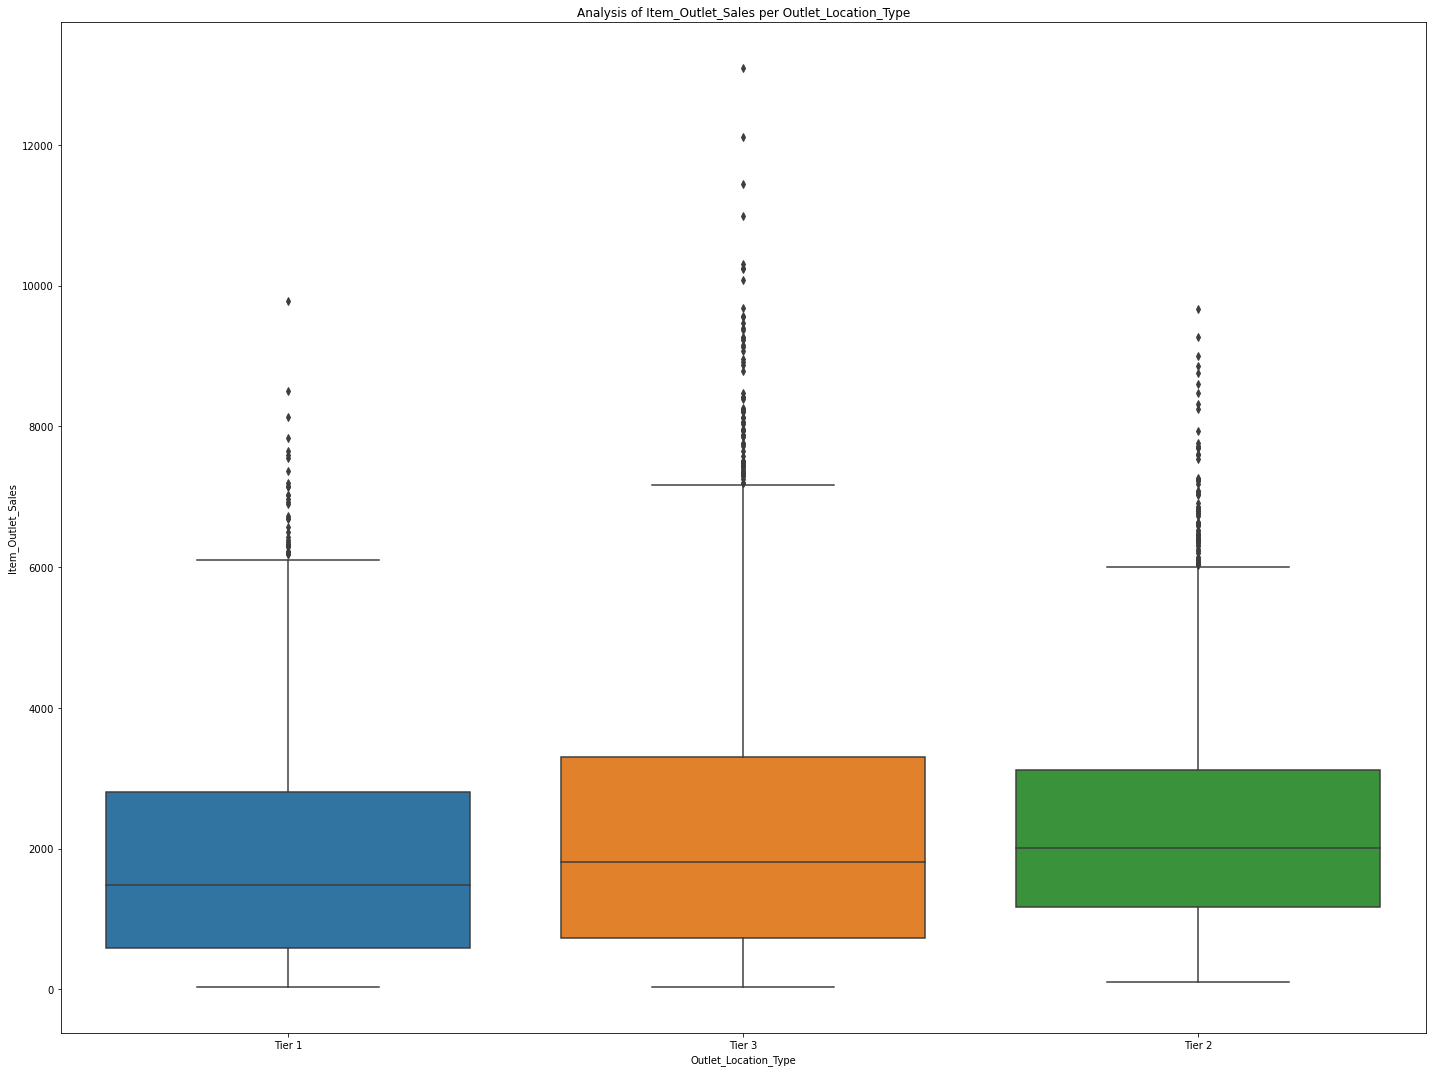

In [48]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data=store_data,y=store_data['Item_Outlet_Sales'],x=store_data['Outlet_Location_Type'])
plt.title('Analysis of Item_Outlet_Sales per Outlet_Location_Type')
plt.tight_layout()
plt.show()

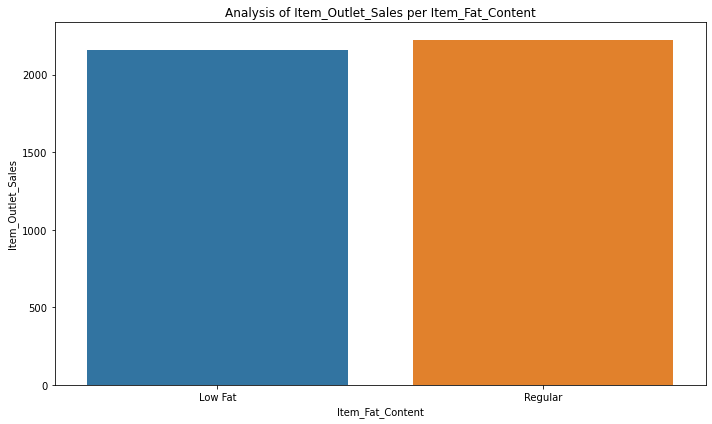

In [49]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=store_data,y=store_data['Item_Outlet_Sales'],x=store_data['Item_Fat_Content'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Item_Fat_Content')
plt.tight_layout()
plt.show()

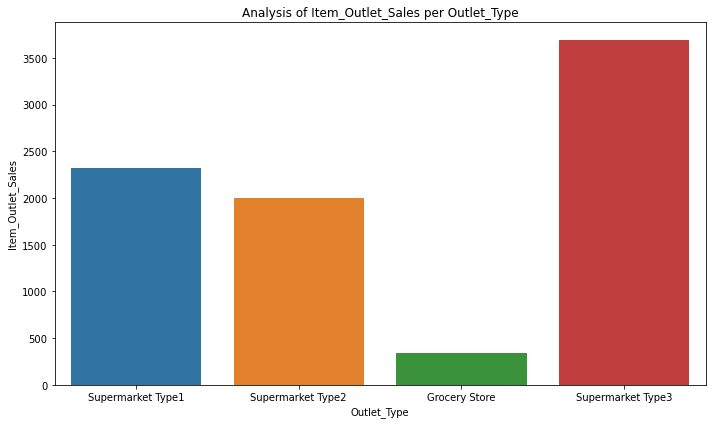

In [50]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=store_data,y=store_data['Item_Outlet_Sales'],x=store_data['Outlet_Type'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Outlet_Type')
plt.tight_layout()
plt.show()

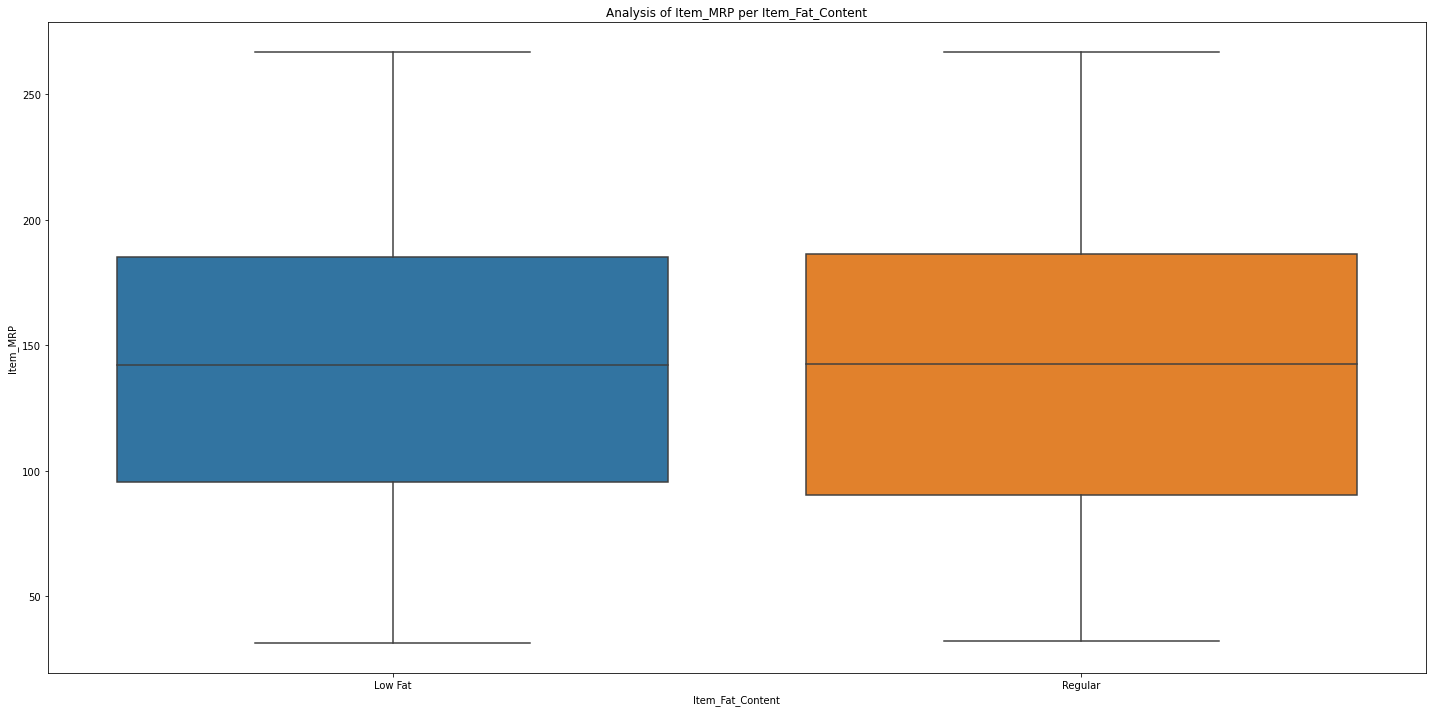

In [51]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(data=store_data,y=store_data['Item_MRP'],x=store_data['Item_Fat_Content'])
plt.title('Analysis of Item_MRP per Item_Fat_Content')
plt.tight_layout()
plt.show()

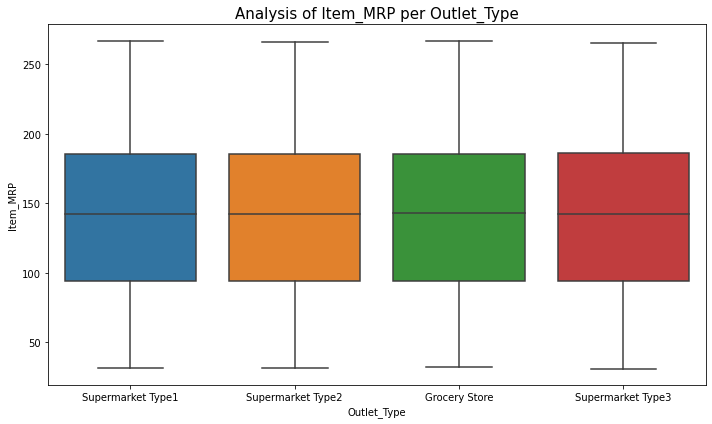

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=store_data,y=store_data['Item_MRP'],x=store_data['Outlet_Type'])
plt.title('Analysis of Item_MRP per Outlet_Type',fontsize=15)
plt.tight_layout()
plt.show()

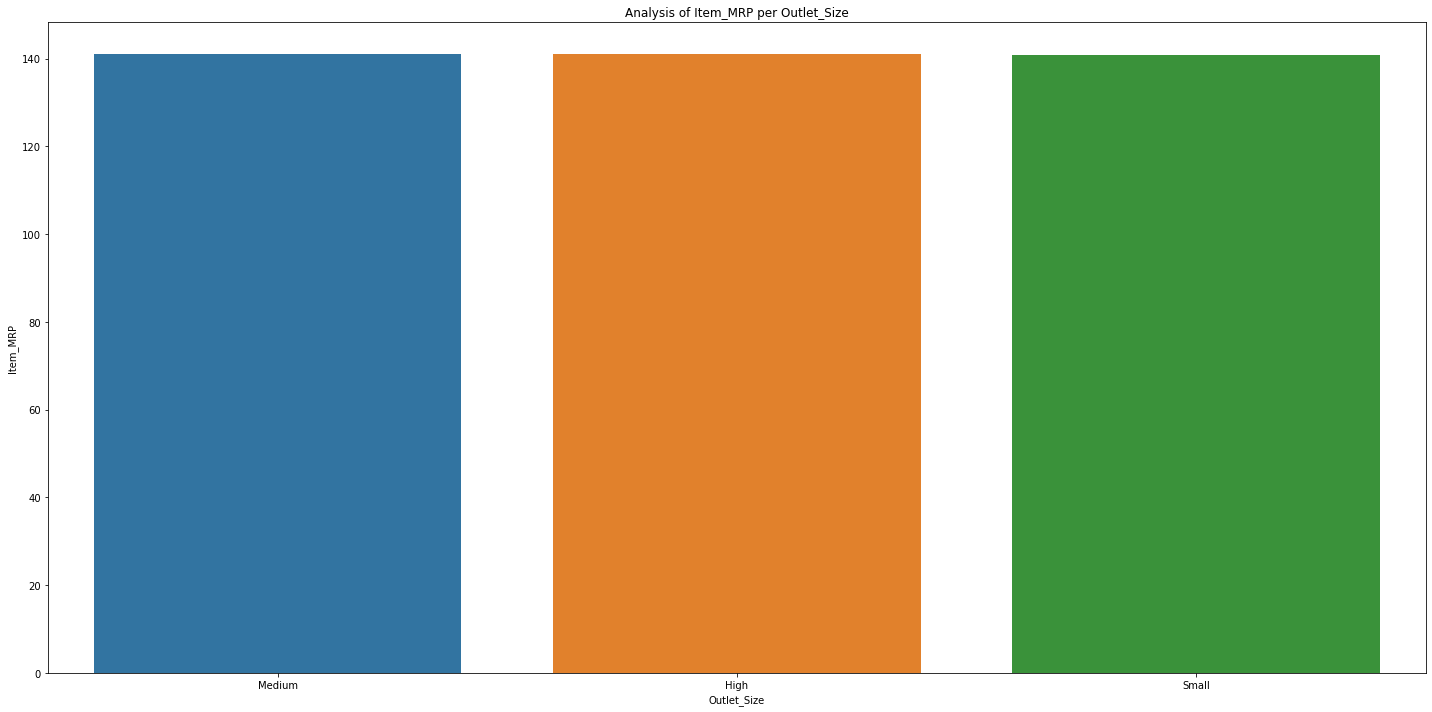

In [53]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=store_data,y=store_data['Item_MRP'],x=store_data['Outlet_Size'],ci=False)
plt.title('Analysis of Item_MRP per Outlet_Size')
plt.tight_layout()
plt.show()

### Continuous to Continuous

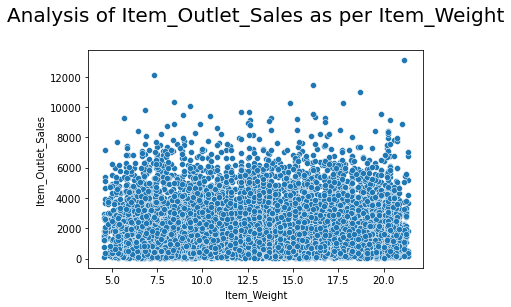

In [54]:
plt.title('Analysis of Item_Outlet_Sales as per Item_Weight\n',fontsize=20)
sns.scatterplot(y = "Item_Outlet_Sales", x = "Item_Weight", data = store_data,palette='magma')
plt.show()

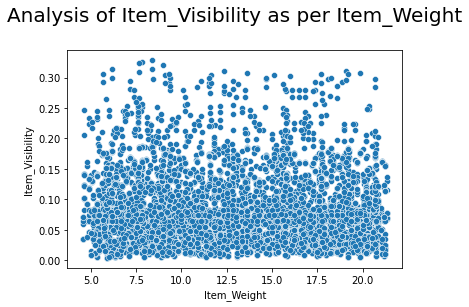

In [55]:
plt.title('Analysis of Item_Visibility as per Item_Weight\n',fontsize=20)
sns.scatterplot(y = "Item_Visibility", x = "Item_Weight", data = store_data,palette='magma')
plt.show()

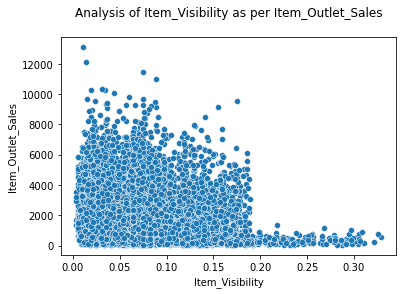

In [56]:
plt.title('Analysis of Item_Visibility as per Item_Outlet_Sales\n')
sns.scatterplot(x = "Item_Visibility", y = "Item_Outlet_Sales", data = store_data)
plt.show()

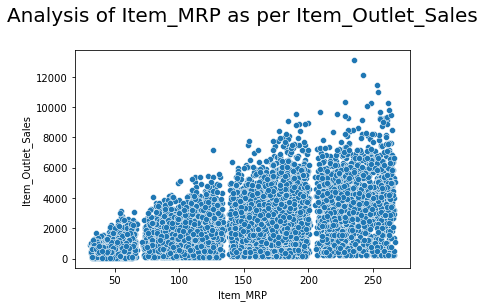

In [57]:
plt.title('Analysis of Item_MRP as per Item_Outlet_Sales\n',fontsize=20)
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales", data = store_data,palette='magma')
plt.show()

## corelation

In [59]:
cor=store_data.corr()['Item_Outlet_Sales']
cor.sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.013261
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.135247
Name: Item_Outlet_Sales, dtype: float64

In [60]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_sales_df_c = store_data.select_dtypes(include='number')
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_sales_df_c.to_numpy()),columns=new_sales_df_c.columns)
    return df_scaled

In [61]:
scale = 'minmax' #standard
sales_df_scaled=feature_scale(scale)
sales_df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.282525,0.038399,0.927507,0.583333,0.283587
1,0.081274,0.048346,0.072068,1.000000,0.031419
2,0.770765,0.040593,0.468288,0.583333,0.158115
3,0.871986,0.218055,0.640093,0.541667,0.053555
4,0.260494,0.186950,0.095805,0.083333,0.073651
...,...,...,...,...,...
14199,0.353974,0.030546,0.467004,0.500000,NaN
14200,0.181304,0.429216,0.585126,1.000000,NaN
14201,0.324204,0.215364,0.371199,0.708333,NaN
14202,0.639774,0.188211,0.778154,0.916667,NaN


In [62]:
corr=store_data.corr()
corr.style.background_gradient(cmap='magma')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020472,0.035751,0.000247,0.013261
Item_Visibility,-0.020472,1.000000,-0.009144,-0.090833,-0.135247
Item_MRP,0.035751,-0.009144,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000247,-0.090833,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000


<AxesSubplot:>

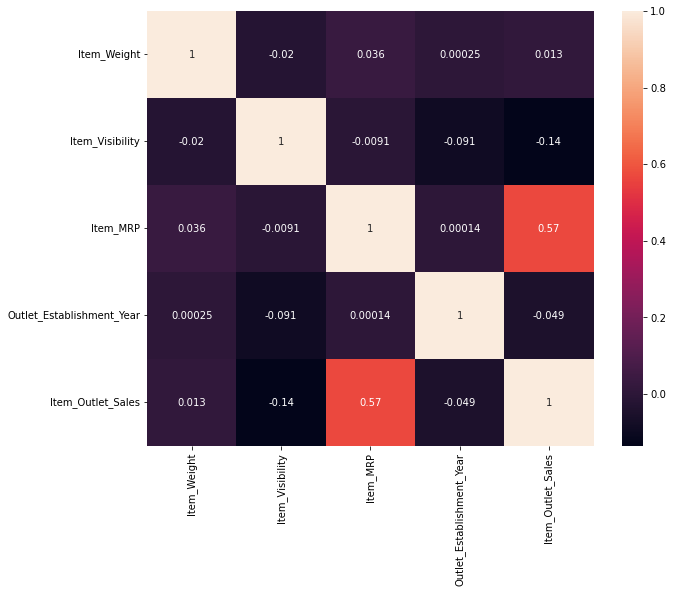

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(sales_df_scaled.corr(),annot=True)

# Preprocessing 
## Label Encoding 

In [64]:
for i in store_data.columns:
    if store_data[i].nunique()<50:
        print(i,':',store_data[i].unique())

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year : [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label=LabelEncoder()

In [68]:
store_data['Item_Fat_Content']=label.fit_transform(store_data['Item_Fat_Content'])
store_data['Item_Type']=label.fit_transform(store_data['Item_Type'])
store_data['Outlet_Identifier']=label.fit_transform(store_data['Outlet_Identifier'])
store_data['Outlet_Size']=label.fit_transform(store_data['Outlet_Size'])
store_data['Outlet_Location_Type']=label.fit_transform(store_data['Outlet_Location_Type'])
store_data['Outlet_Type']=label.fit_transform(store_data['Outlet_Type'])
store_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
NCD19,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [70]:
validate_data=store_data.loc[store_data['Item_Outlet_Sales'].isnull(),:]
validate_data.head()
validate_data.shape
validate_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
FDW14,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
NCN55,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
FDQ58,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN
FDY38,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,NaN


##### Test and Train Dataset 

In [71]:
store_data=store_data.loc[store_data['Item_Outlet_Sales'].notna(),:]
store_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
NCD19,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [72]:
store_data.shape

(8523, 11)

In [73]:
X=store_data.drop(columns='Item_Outlet_Sales')
y=store_data['Item_Outlet_Sales']

# Scaling 

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scale=StandardScaler()

In [87]:
X1=X.copy()
X2=scale.fit_transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,1.507813,0.139541,-0.575119,-1.369334,-0.252658
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,-0.607071,1.334103,-0.575119,1.091569,1.002972
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,1.507813,0.139541,-0.575119,-1.369334,-0.252658
3,1.361794,1.354743,0.080475,-0.291391,0.660050,-1.664513,0.020085,-0.575119,1.091569,-1.508289
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.312032,-1.293934,-2.055561,1.091569,-0.252658


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)
print(x_train.shape)
print(x_test.shape)

(5966, 10)
(2557, 10)


#### Splitting data into train and test.

In [74]:
store_data1=store_data.select_dtypes('number')

In [75]:
train=store_data1[store_data1['Item_Outlet_Sales'].isnull()]
test=store_data1[store_data1['Item_Outlet_Sales'].isnull()]

In [76]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,


In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)
print(x_train.shape)
print(x_test.shape)

(5966, 10)
(2557, 10)


#### Model Building 

In [90]:
names=[]
result=[]

In [92]:
def error(x,y):
    print('ERRORS')
    print('MAE is :',mean_absolute_error(x,y))
    print('MSE is :',mean_squared_error(x,y))
    rmse=np.sqrt(mean_squared_error(x,y))
    print('RMSE is :',rmse)

## Linear regression

In [93]:
model_linear=LinearRegression()

In [94]:
names.append(model_linear)
model_linear.fit(x_train,y_train)

LinearRegression()

In [95]:
#score or efficiency
model_linear.score(x_test,y_test)
result.append(model_linear.score(x_test,y_test))
model_linear.score(x_test,y_test)

0.4929601449378269

In [96]:
#Intercept
model_linear.intercept_

2190.684887149874

In [98]:
#Slope
model_linear.coef_

array([ -6.36781257,  29.90566909, -85.66406109,   3.73791455,
       977.63461008, 153.40174019, -17.90040022, -12.72918158,
       -64.89152574, 688.56529534])

In [99]:
#Important Fetaures 
pd.DataFrame(model_linear.coef_.reshape(-1,1),columns=['slope'],index=X.columns).sort_values(by='slope',ascending=False)

,slope
Item_MRP,977.634610
Outlet_Type,688.565295
Outlet_Identifier,153.401740
Item_Fat_Content,29.905669
Item_Type,3.737915
Item_Weight,-6.367813
Outlet_Size,-12.729182
Outlet_Establishment_Year,-17.900400
Outlet_Location_Type,-64.891526
Item_Visibility,-85.664061


In [101]:
# Predict
y_pred=model_linear.predict(x_test)
y_pred

array([2330.57954905, 3844.51241712,  178.35121435, ..., 2831.39452252,
        373.06753132, 2451.04769627])

In [102]:
#Errors
error(y_test,y_pred)

ERRORS
MAE is : 911.6010104038805
MSE is : 1493299.4470670058
RMSE is : 1222.0063203875034


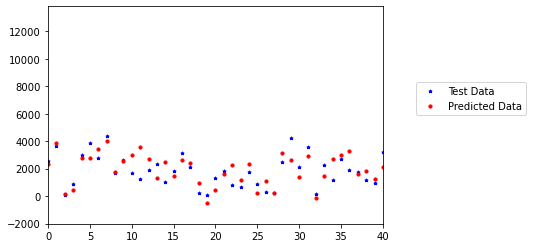

In [103]:
#plot
plt.scatter(range(len(y_test)),y_test,s=10,marker='*',c='blue',label='Test Data')
plt.scatter(range(len(y_test)),y_pred,s=10,marker='o',c='red',label='Predicted Data')
plt.xlim(0,40)
plt.legend(loc=(1.1,0.5))
plt.show()

In [104]:
names.append(model_linear)
model_linear.fit(x_train,y_train)

LinearRegression()

In [105]:
model_linear.score(x_test,y_test)
result.append(model_linear.score(x_test,y_test))
model_linear.score(x_test,y_test)

0.4929601449378269

In [106]:
model_linear.intercept_

2190.684887149874

In [107]:
model_linear.coef_

array([ -6.36781257,  29.90566909, -85.66406109,   3.73791455,
       977.63461008, 153.40174019, -17.90040022, -12.72918158,
       -64.89152574, 688.56529534])

In [108]:
pd.DataFrame(model_linear.coef_.reshape(-1,1),columns=['slope'],index=X.columns).sort_values(by='slope',ascending=False)

,slope
Item_MRP,977.634610
Outlet_Type,688.565295
Outlet_Identifier,153.401740
Item_Fat_Content,29.905669
Item_Type,3.737915
Item_Weight,-6.367813
Outlet_Size,-12.729182
Outlet_Establishment_Year,-17.900400
Outlet_Location_Type,-64.891526
Item_Visibility,-85.664061


In [109]:
y_pred=model_linear.predict(x_test)

In [110]:
error(y_test,y_pred)

ERRORS
MAE is : 911.6010104038805
MSE is : 1493299.4470670058
RMSE is : 1222.0063203875034


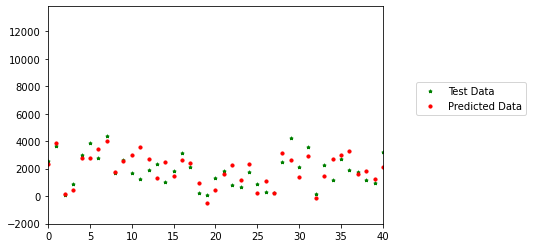

In [111]:
plt.scatter(range(len(y_test)),y_test,s=10,marker='*',c='green',label='Test Data')
plt.scatter(range(len(y_test)),y_pred,s=10,marker='o',c='red',label='Predicted Data')
plt.xlim(0,40)
plt.legend(loc=(1.1,0.5))
plt.show()

In [112]:
from sklearn.model_selection import KFold

In [113]:
kfold=KFold(n_splits=5,shuffle=True,random_state=7)

In [114]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [115]:
params={
    'alpha':[0.5,0.7,0.8,1,2,3,5,7,8,9,10,14]
}

In [116]:
model_ridge=Ridge()
names.append(Ridge)

In [117]:
grid=GridSearchCV(estimator=model_ridge,param_grid=params,n_jobs=-1,verbose=0,cv=kfold)

In [118]:
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.7, 0.8, 1, 2, 3, 5, 7, 8, 9, 10, 14]})

In [119]:
grid.best_score_

0.504153523478186

In [120]:
best_ridge=grid.best_estimator_
best_ridge

Ridge(alpha=7)

In [121]:
result.append(best_ridge.score(x_test,y_test))
best_ridge.score(x_test,y_test)

0.4929942799428839

In [122]:
y_ridge=best_ridge.predict(x_test)

In [123]:
error(y_test,y_ridge)

ERRORS
MAE is : 911.4896650236509
MSE is : 1493198.914961554
RMSE is : 1221.965185658558


In [124]:
# Decision Tree Regressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

In [125]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))

R-Squared on train dataset=0.5915918275645786


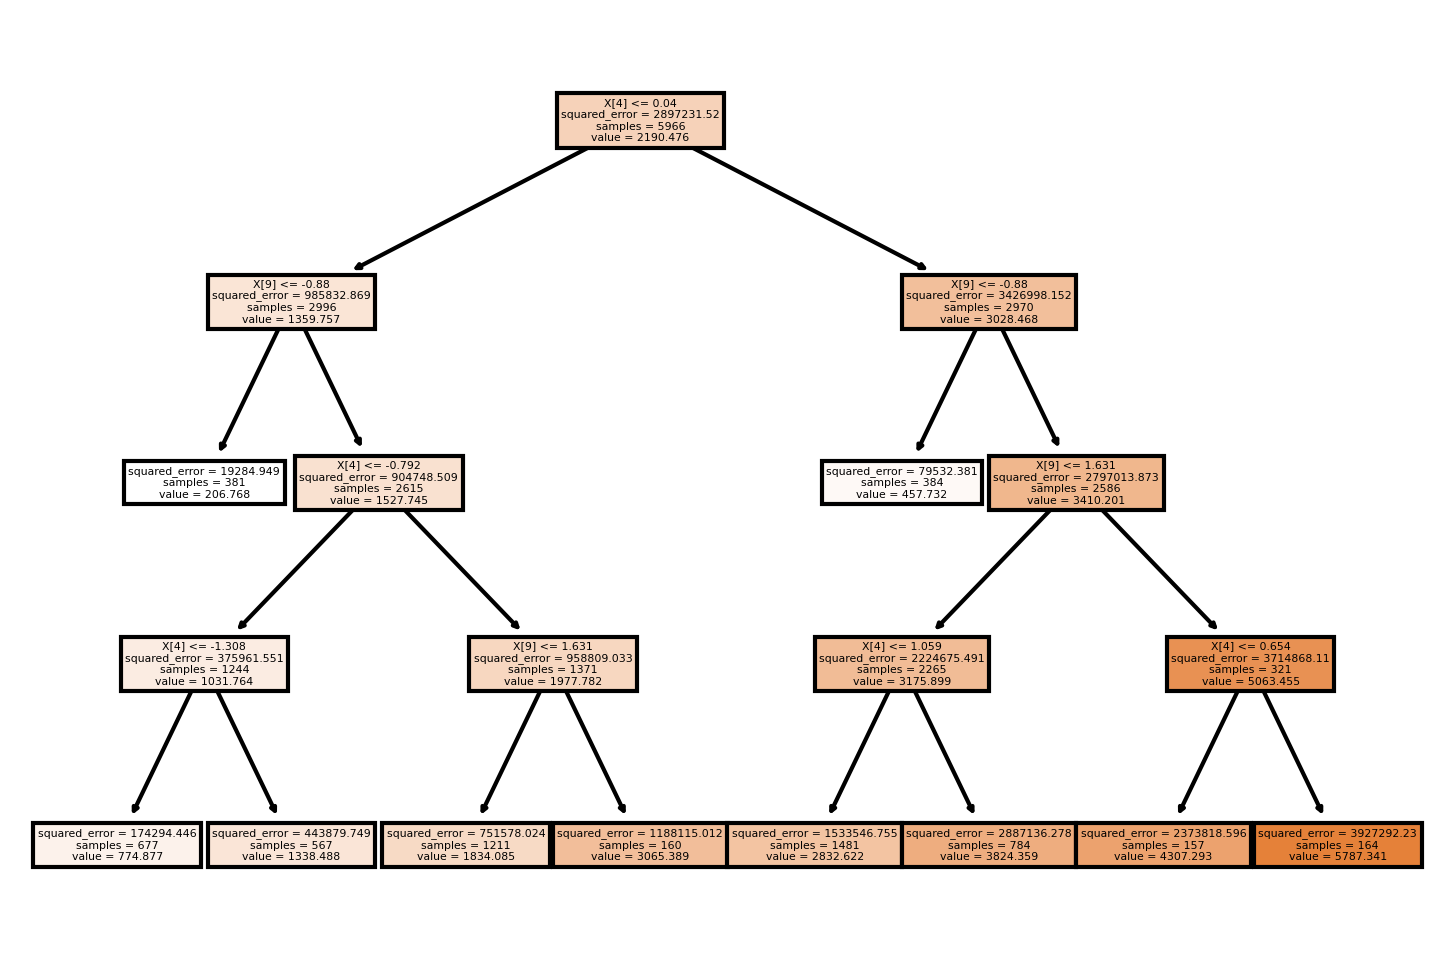

In [126]:
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(dtm,filled = True);
fig.savefig('Bike_regression_decisiontree.png')

In [127]:
y_dec_pred = dtm.predict(x_test)

In [128]:
df_dt = pd.DataFrame(y_dec_pred, columns=['Prediction'])
df_dt.head()

,Prediction
0,2832.622048
1,4307.293442
2,206.768471
3,774.877119
4,2832.622048


In [129]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [130]:
forest.score(x_train,y_train)

0.9381715968984495

In [131]:
y_pred_rf=forest.predict(x_test)

In [132]:
df_dt = pd.DataFrame(y_pred_rf, columns=['Prediction'])
df_dt.head()

,Prediction
0,2867.014696
1,4064.342810
2,223.382558
3,847.743166
4,2014.943830


In [133]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
grid_search = GridSearchCV(estimator=forest,param_grid=params,cv = 4, n_jobs=-1, verbose=1, scoring="r2")

In [136]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [137]:
grid_search.best_score_

0.6016204048154946

In [139]:
y_pred_rf1=model_linear.predict(x_test)
df_rf1 = pd.DataFrame(y_pred_rf1, columns=['Prediction'])
df_rf1.head()

,Prediction
0,2330.579549
1,3844.512417
2,178.351214
3,473.011827
4,2758.090442


In [141]:
print('linear regression score:',model_linear.score(x_train,y_train))
print('Decision tree score:',dtm.score(x_train,y_train))
print('Random forest score without hyperparameter tuning:',forest.score(x_train,y_train))
print('Random forest with hyperparameter tuning:',grid_search.best_score_)

linear regression score: 0.506180857461775
Decision tree score: 0.5915918275645786
Random forest score without hyperparameter tuning: 0.9381715968984495
Random forest with hyperparameter tuning: 0.6016204048154946
